In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.optimizers import SGD,Adam
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier
from keras.regularizers import L2

In [2]:
veri = pd.read_csv("car_price_prediction.csv")
veri

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [3]:
veri.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
veri.Levy.unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [6]:
veri.Levy = veri.Levy.replace("-",np.nan)

In [7]:
veri.isnull().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [8]:
veri.Levy = veri.Levy.fillna(0)
veri.Levy = veri.Levy.astype(int)
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  int32  
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [9]:
veri["Engine volume"].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [10]:
veri["Turbo"] = veri["Engine volume"].apply(lambda x:"Turbo" if "Turbo" in str(x) else "Non Turbo")
veri

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Non Turbo
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,Non Turbo
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,Non Turbo
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,Non Turbo
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,Non Turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,Turbo
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,Non Turbo
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,Non Turbo
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,Non Turbo


In [11]:
veri["Engine volume"] = veri["Engine volume"].apply(lambda x: str(x).replace(" Turbo","")).astype(float)
veri.drop("ID",axis=1,inplace=True)
veri

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,Non Turbo
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,Non Turbo
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,Non Turbo
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,Non Turbo
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,Non Turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,Turbo
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,Non Turbo
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,Non Turbo
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,Non Turbo


In [12]:
veri["Engine volume"].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [13]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  int32  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float64
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [14]:
veri.Mileage = veri.Mileage.apply(lambda x: str(x).replace(" km","")).astype(int)
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  int32  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float64
 9   Mileage           19237 non-null  int32  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [15]:
veri.Mileage.unique()

array([186005, 192000, 200000, ..., 140607, 307325, 186923])

In [16]:
veri.Cylinders = veri.Cylinders.astype(int)

In [17]:
veri.Doors.unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [18]:
veri.Doors = np.where(veri.Doors == "04-May",4,
                     np.where(veri.Doors == "02-Mar",2,5))

veri.Doors = veri.Doors.astype(int)
veri

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,4,Left wheel,Silver,12,Non Turbo
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,4,Left wheel,Black,8,Non Turbo
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,4,Right-hand drive,Black,2,Non Turbo
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,4,Left wheel,White,0,Non Turbo
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,4,Left wheel,Silver,4,Non Turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4,Manual,Rear,2,Left wheel,Silver,5,Turbo
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,4,Left wheel,Red,8,Non Turbo
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4,Automatic,Front,4,Left wheel,Grey,4,Non Turbo
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4,Automatic,Front,4,Left wheel,Black,4,Non Turbo


In [19]:
cat = []
for i in veri.columns:
    if veri[i].dtypes == "object":
        cat.append(i)
cat      

['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color',
 'Turbo']

In [20]:
le = LabelEncoder()
for i in cat:
    veri[i] = le.fit_transform(veri[i])
    
y = veri.Price
x = veri.drop(columns="Price")

sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1, random_state=0)

In [21]:
model = Sequential()
model.add(Dense(64,input_dim=x_train.shape[1],activation="linear"))
model.add(Dense(32,activation="linear"))
model.add(Dense(1,activation="linear"))

model.compile(loss="mae",optimizer="adam",metrics=["mae"])
m1 = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,verbose=0)

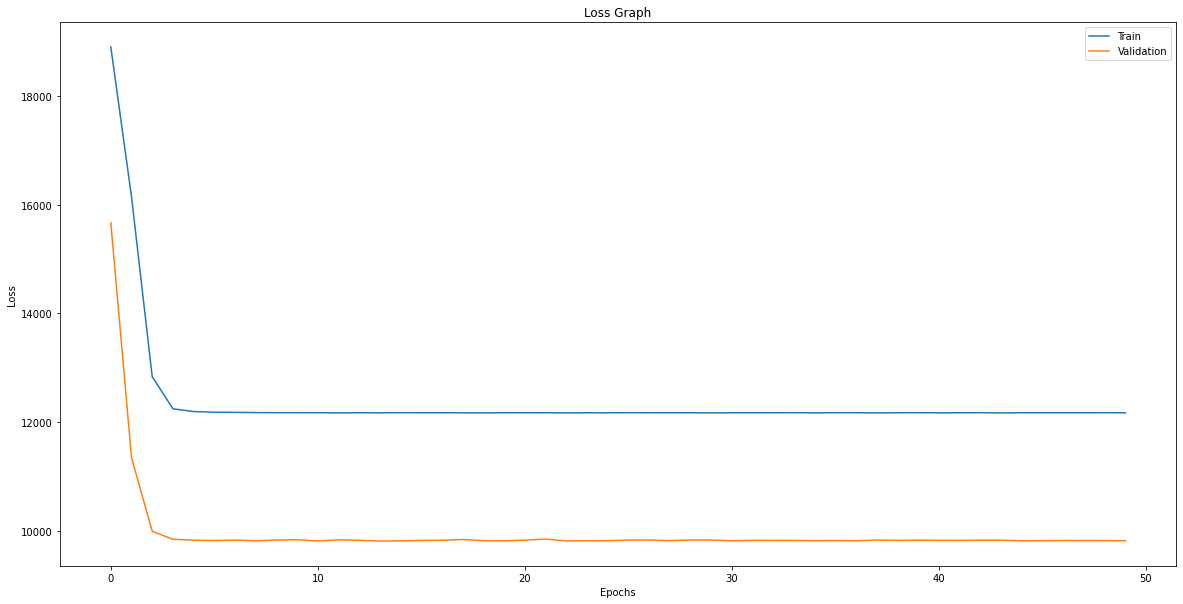

In [22]:
plt.figure(figsize=(20,10))
plt.plot(m1.history["loss"])
plt.plot(m1.history["val_loss"])
plt.title("Loss Graph")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Train","Validation"],loc="upper right");

In [26]:
y_test[:50].values

array([10697, 42337,   314,  2800,   251,   157, 21395,   706,   470,
        1700,   282,  1098, 18817,  2274,  7370,    25, 13476,  3293,
       21953, 43134, 48534,  1568, 29793, 15681, 19757,  7370, 12083,
       28532, 40954,  5488,  6586,   157,  2901, 26343, 16621, 24123,
       15367, 15681,  3607, 28078,  7524, 18189, 81539,  3293,   549,
       15053, 12544, 35752, 17249,  1725], dtype=int64)

121/121 [==============================] - 0s 2ms/step


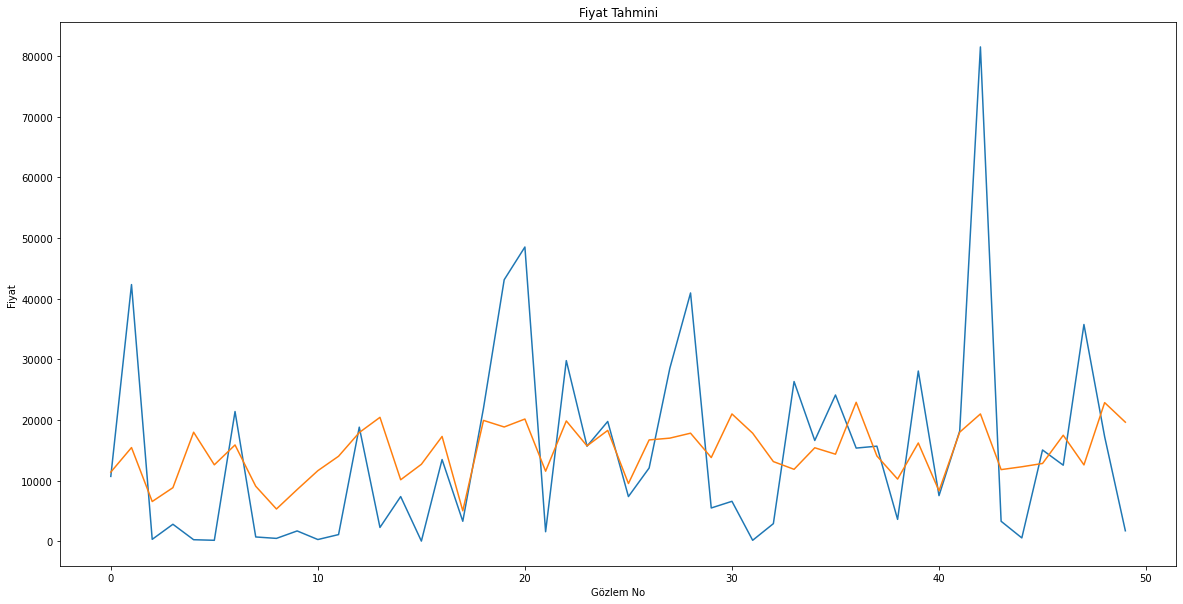

In [27]:
tahmin = model.predict(x_test)


plt.figure(figsize=(20,10))
plt.plot(range(len(y_test[:50])), y_test[:50].values , label="Gerçek")
plt.plot(range(len(y_test[:50])), tahmin[:50] , label="Tahmin")
plt.title("Fiyat Tahmini")
plt.ylabel("Fiyat")
plt.xlabel("Gözlem No")
plt.show()

C:\Users\Burak\AppData\Local\Temp\ipykernel_5516\3481215030.py:21: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regres = KerasRegressor(build_fn=modelkur,verbose=0)


121/121 [==============================] - 0s 1ms/step


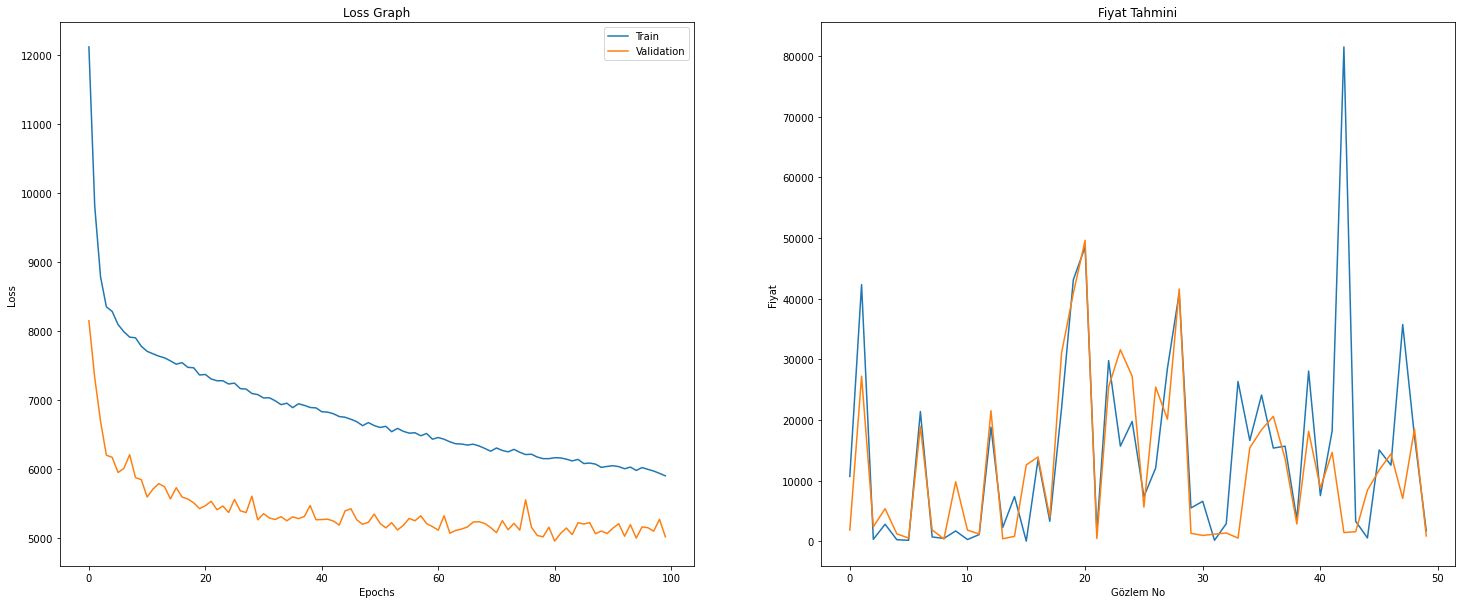

In [28]:
def modelkur(units=64, activation="linear", learning_rate=0.01, hidden_layers=2, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(units=units,input_dim=x_train.shape[1],activation=activation))
    
    for i in range(hidden_layers):
        model.add(Dense(units=units,activation=activation))
        model.add(Dropout(dropout_rate))
        
    model.add(Dense(1,activation=activation))

    model.compile(loss="mae",optimizer=Adam(learning_rate),metrics=["mae"])
    return model

parametreler = {"units":        [32,64],
                "activation":   ["linear","relu"],
                "learning_rate":[0.001,0.01],
                "hidden_layers":[2,3],
                "dropout_rate": [0.0, 0.2],
                "epochs":       [50,100]}

regres = KerasRegressor(build_fn=modelkur,verbose=0)
grid = GridSearchCV(estimator=regres, param_grid=parametreler,cv=3)
gridsonuc = grid.fit(x_train, y_train)
bestparam = gridsonuc.best_params_

bestmodel = modelkur(units=bestparam["units"],activation=bestparam["activation"], 
                     learning_rate=bestparam["learning_rate"], hidden_layers=bestparam["hidden_layers"],
                     dropout_rate=bestparam["dropout_rate"])

m1 = bestmodel.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=bestparam["epochs"],verbose=0, batch_size=64)
tahmin = bestmodel.predict(x_test)


fig,ax = plt.subplots(1,2,figsize=(25,10))

ax[0].plot(m1.history["loss"])
ax[0].plot(m1.history["val_loss"])
ax[0].set_title("Loss Graph")
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epochs")
ax[0].legend(["Train","Validation"],loc="upper right");


ax[1].plot(range(len(y_test[:50])), y_test[:50].values , label="Gerçek")
ax[1].plot(range(len(y_test[:50])), tahmin[:50] , label="Tahmin")
ax[1].set_title("Fiyat Tahmini")
ax[1].set_ylabel("Fiyat")
ax[1].set_xlabel("Gözlem No")

plt.show()